# Estabilidad de un sistema RLC usando el método directo de Lyapunov

El objetivo es estudiar el circuito **RLC en serie** sin fuente externa y aplicar el método directo de Lyapunov para analizar la estabilidad de su punto fijo.

## Osciladores y sistemas disipativos: analogía con el circuito RLC

Antes de estudiar el sistema RLC, recordemos dos sistemas mecánicos ya conocidos:

### 1. El oscilador armónico amortiguado

Este sistema describe una **masa unida a un resorte con fricción**. Su ecuación es:

$$
m \ddot{x} + b \dot{x} + kx = 0
$$

Donde:
- $m$ es la masa,
- $b$ es el coeficiente de fricción (resistencia del medio),
- $k$ es la constante del resorte,
- $x(t)$ es la posición de la masa.

Este sistema **oscila** si la fricción no es muy grande ($b^2<4mk$), pero con amplitud decreciente por la disipación de energía.

---

### 2. El péndulo simple con fricción

El péndulo simple con amortiguamiento está gobernado por la ecuación:

$$
\ddot{\theta} + \gamma \dot{\theta} + \omega^2 \sin(\theta) = 0
$$

Cuando el ángulo es pequeño, se puede aproximar $ \sin(\theta) \approx \theta $, lo cual nos da una forma lineal semejante al oscilador anterior:

$$
\ddot{\theta} + \gamma \dot{\theta} + \omega^2 \theta = 0
$$

---



# Modelo

Antes de introducir el modelo matemático, pensemos qué ocurre físicamente en un circuito **RLC** en serie. Este circuito contiene tres componentes fundamentales que almacenan o disipan energía a medida que los electrones fluyen:


### 🔴 Resistencia $ R $

La resistencia es como la **fricción** en un sistema mecánico. Cuando los electrones se mueven, chocan con los átomos del conductor, generando **calor**. Este calor disipa la energía del sistema. 

📍 Ejemplos cotidianos:
- El filamento de una bombilla incandescente (se calienta por la resistencia).
- Un cargador de celular: se calienta mientras está funcionando.

### 🌀 Inductancia $ L $

Una **bobina** (inductor) almacena energía en un **campo magnético** cuando pasa corriente por ella. Resiste los cambios bruscos en la corriente, actuando como un **"resorte eléctrico"**.

📍 Ejemplos:
- Bobinas en motores eléctricos.
- Cargadores inalámbricos (uso de campos magnéticos).

### 🟢 Capacitancia $ C $

Un **capacitor** (condensador) almacena energía en un **campo eléctrico**. Cuando se carga, puede "empujar" a los electrones de regreso, como un globo que se comprime y luego se suelta.

📍 Ejemplos:
- Flash de una cámara.
- Cualquier fuente de poder (almacena energía para liberarla en momentos específicos).



![Diagrama de circuito](imgs/RLC_series.png)

**En orden de izquierda a derecha, una resistencia, una bobina y un capacitor conectados en serie.**


## 🔌 ¿Qué hacen los electrones en el circuito?

Imagina que los electrones se comportan como agua en una tubería: fluyen cuando hay una diferencia de energía (como presión en un tubo). En un circuito, esa "presión" la da una fuente de voltaje, y el movimiento de los electrones es lo que llamamos **corriente eléctrica**.

Cuando conectamos estos tres componentes en serie y dejamos que el sistema evolucione, la energía oscila entre la bobina(en forma de campo magnetico) y el capacitor(en forma de campo electrico), pero **la resistencia va quitando energía** poco a poco disipandola en calor. Esto da lugar a un sistema **oscilatorio amortiguado**.


Un circuito RLC en serie obedece la siguiente ecuación:

$$
L \frac{d^2 q}{dt^2} + R \frac{dq}{dt} + \frac{1}{C} q = 0
$$


Donde:

- $q(t)$ es la carga en el circuito (al tiempo $t$)
- $I = \frac{dq}{dt}$ es la corriente en el circuito
- $R$ es la resistencia del circuito 
- $L$ es la inductancia de la bobina 
- $C$ es la capacitancia del capacitor


Definiendo el vector

$$
\mathbf{x} = \begin{bmatrix} q \\ I \end{bmatrix},
$$

obtenemos el sistema lineal

$$
\dot{\mathbf{x}} = \begin{bmatrix}
0 & 1 \\
-\frac{1}{LC} & -\frac{R}{L}
\end{bmatrix} \mathbf{x}.
$$


El equilibrio se halla de $\dot{\mathbf{x}} = 0$, lo que implica

$$
q^\star = 0, \qquad I^\star = 0.
$$

Por lo tanto el **origen** $(q, I) = (0, 0)$ es el único punto fijo.


Podemos usar el **método directo de Lyapunov** para verificar que el origen es un **punto fijo asintoticamente estable** sin tener que resolver la ecuación. 

Recordemos que una buena función de Lyapunov en sistemas físicos es la energía total, en este caso la energía total del circuito es la suma de la energía magnética del inductor y la energía eléctrica del capacitor:

$$
V(q, I) = \frac{1}{2}LI^2 + \frac{1}{2C}q^2.
$$

$V$ cumple con se definida positiva y la derivada de $V$ a lo largo de las trayectorias, por la **regla de la cadena** esta dada por 

$$
\dot{V} =\frac{d}{dt} V(\mathbf{x}(t)) = \nabla V \cdot \dot{\mathbf{x}}(t)
$$

Calculamos las derivadas parciales de $V$:

$$
\frac{\partial V}{\partial q} = \frac{q}{C}, \qquad \frac{\partial V}{\partial I} = LI.
$$
Se tiene

$$
\dot{V} = \frac{\partial V}{\partial q} \dot{q} + \frac{\partial V}{\partial I} \dot{I}
= \frac{q}{C} \dot{q} + LI \dot{I}. \tag{1}
$$

El modelo dinámico es

$$
Lİ + RI + \frac{q}{C} = 0. \tag{2}
$$

Asimismo, por definición de corriente,

$$
\dot{q} = I. \tag{3}
$$

Primero sustituimos $\dot{q}$ usando (3) en (1):

$$
\dot{V} = \frac{q}{C}I + LI\dot{I} = I\left(\frac{q}{C} + L\dot{I}\right). \tag{4}
$$

A continuación, obtenemos $\frac{q}{C}$ a partir de (2):

$$
\frac{q}{C} = -L\dot{I} - RI. \tag{5}
$$


Insertamos (5) en (4):

$$
\dot{V} = I\left( -L\dot{I} - RI + L\dot{I} \right) = I(-RI) = -RI^2. \tag{6}
$$

Así, $\dot{V}$ es negativa definida y por el método directo de Lyapunov podemos concluir que el el **origen** $(q, I) = (0, 0)$ es un punto asintóticamente estable. 

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parámetros del sistema
L = 1.0    # Henrios
C = 1.0    # Faradios
R = 0.5    # Ohmios

# Sistema de ecuaciones
def sistema_rlc(t, x):
    x1, x2 = x
    dx1 = x2
    dx2 = - (R / L) * x2 - (1 / (L * C)) * x1
    return [dx1, dx2]


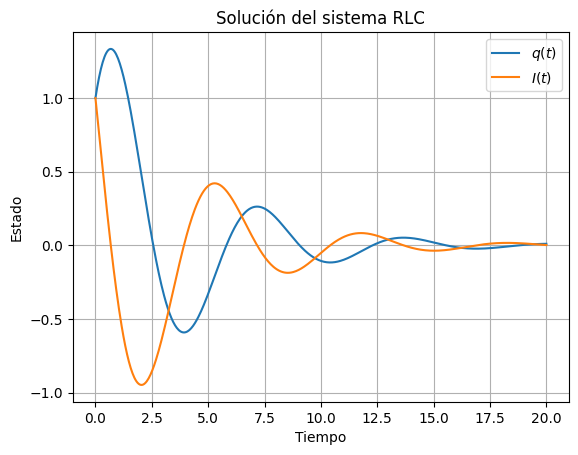

In [4]:
# Condiciones iniciales
x0 = [1.0, 1.0]  # Corriente inicial = 1 A, derivada inicial = 0


# Tiempo de simulación
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Resolver sistema
sol = solve_ivp(sistema_rlc, t_span, x0, t_eval=t_eval)

# Graficar resultados
plt.plot(sol.t, sol.y[0], label='$q(t)$')
plt.plot(sol.t, sol.y[1], label='$I(t)$')
plt.title('Solución del sistema RLC')
plt.xlabel('Tiempo')
plt.ylabel('Estado')
plt.grid(True)
plt.legend()
plt.show()
